# Decision Tree
- - -

- 의사 결정 나무(Decision Tree)는 분류, 회귀 문제에 널리 사용하는 모델입니다.
- 의사 결정 나무를 이용한 분류법은 다음과 같습니다.
    1. 여러가지 독립변수 중 하나의 독립변수를 선택합니다.
    2. 그 독립변수에 대한 기준값(threshold) - 분류 규칙 - 을 정합니다.
    3. 전체 학습 데이터 집합을 분류 규칙에 따라, 기준값보다 큰 데이터 그룹(노드 1)과 기준값보다 작은 데이터 그룹(노드 2)로 나눕니다.
    4. 각 노드에 대해서 1~3 단계를 반복하여 한 가지 클래스만 존재할 때까지 혹은 사전에 지정한 일정 기준까지 하위 노드를 만듭니다.
    
    

### 의사 결정 나무를 사용한 분류 예측

1. 의사 결정 나무 모형에 데이터를 입력하면, 데이터는 분류 규칙(기준값)에 따라 특정 노드를 선택해서 내려가게 됩니다. 
2. 이때 노드에 속한 데이터의 클래스의 비율을 구하여, 노드의 조건부 확률 분포 $P(Y = k \mid X)_{\text{node}}$ 라고 정의합니다. 

$$P(Y=k \mid X)_{\text{node}} \approx \dfrac{N_{\text{node}, k}}{N_{\text{node}}}$$

### 정보획득량: 분류 규칙을 정하는 방법

1. 분류 규칙은 부모 노드, 자식 노드 간 엔트로피를 가장 낮게 만드는 독립변수와 기준값을 찾는 식으로 이루어집니다. 
2. 다시 말해 정보 획득량(information gain)이 가장 높은 독립변수와 기준값은 찾는 셈인데요. 정보 획득량은 변수 X가 확률변수 Y의 엔트로피를 얼마나 줄였는지 나타내는 값입니다. 

$$IG[Y, X] = H[Y] - H[Y \mid X]$$

#### 부록: 엔트로피

1. 엔트로피
    - 엔트로피는 확률분포가 가질 수 있는 확신의 정도를 수치로 표현한 것입니다. 
    - 예를 들어, 확률변수에 여러가지 값이 나올 확률이 비슷하면 엔트로피가 높아지고, 특정값이 나올 확률이 높아지고 나머지값이 나올 확률이 낮아진다면 엔트로피는 낮아집니다.
    - 수학적으로는 이산확률변수이면,
$$H[Y] = -\sum_{k=1}^K P(y_k) \log_2 P(y_k)$$

    - 연속확률변수이면, 
$$H[Y] = -\int_{-\infty}^{\infty} p(y) \log_2 p(y) \; dy$$

2. 엔트로피와 정보량
    - 엔트로피는 확률변수가 담을 수 있는 정보량을 의미하기도 합니다. 
    - 엔트로피가 0이라면, 확률변수는 결정론적(항상 예측할 수 있는 값이 나온다) 이기 때문에, 추가 정보량은 없습니다.
    - 반면 엔트로피가 크다면, 확률변수는 다양한 결과값을 내놓을 수 있기 때문에 추가로 획득할 수 있는 정보량이 상대적으로 많습니다.
    
3. 크로스엔트로피
    - 크로스엔트로피는 확률분포의 차이를 정량화한 값이지만 기준 분포가 $p$로 고정되어 있습니다. $$H[p, q] \neg H[q, p]$$
    
    - 크로스엔트로피는 분류 모형의 성능을 측정할 때도 사용합니다.

#### 부록: 지니불순도(Gini impurity)

1. 지니불순도는 엔트로피와 유사한 개념으로, 확률분포가 어느 쪽에 치우쳐 있는가를 재는 척도입니다. 
2. 엔트로피와 달리 로그를 사용하지 않아 계산량이 적습니다. 그래서 엔트로피 대용으로 많이 사용합니다.

$$G[Y] = \Sigma_{k=1}^K P(y_k)(1 - P(y_k))$$

# Practice
- - -

## SETUP

In [37]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### 예제 1
- - -

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [12]:
print(X[:10])
print(y[:10])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


In [14]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)
tree1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [18]:
io

<module 'io' from '/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/io.py'>

In [32]:
def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)

In [33]:
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

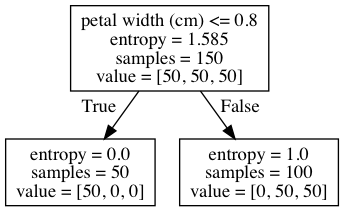

In [35]:
draw_decision_tree(tree1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

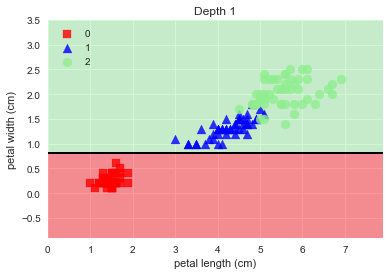

In [39]:
plot_decision_regions(X, y, tree1, "Depth 1")

In [40]:
confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

In [43]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)
tree2

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

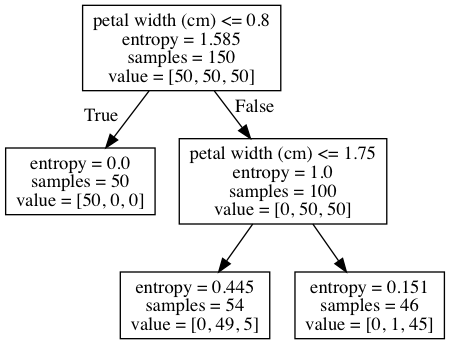

In [44]:
draw_decision_tree(tree2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

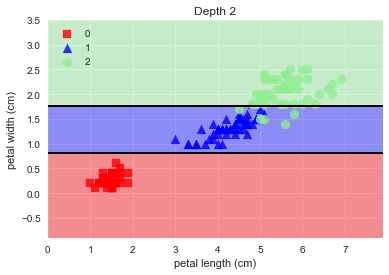

In [46]:
plot_decision_regions(X, y, tree2, "Depth 2")

In [47]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [48]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)
tree3

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

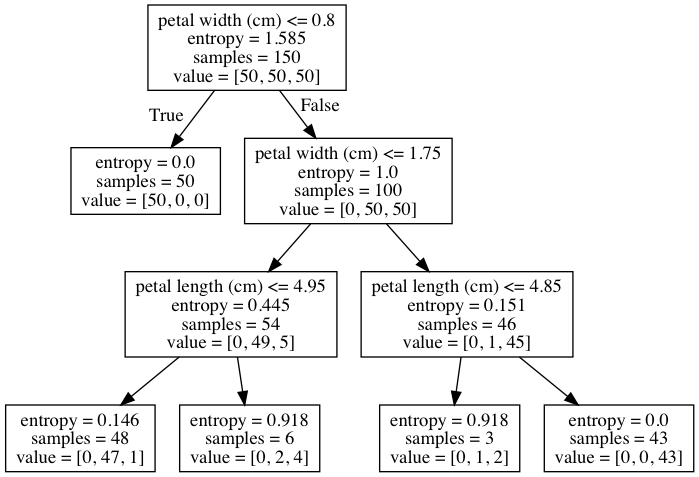

In [49]:
draw_decision_tree(tree3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

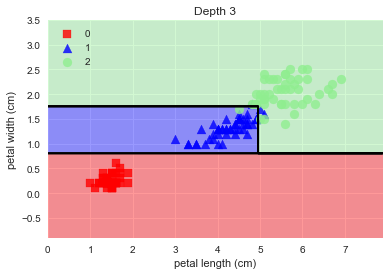

In [50]:
plot_decision_regions(X, y, tree3, "Depth 3")

In [51]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

### 연습 문제 1
- - -

- 붓꽃 분류 문제에서 꽃받침의 길이와 폭을 사용하여 위와 같이 의사 결정 나무 모형을 만들고 정확도(accuracy) 기준으로 성능을 측정한다.
- K=5 인 교차 검증을 통해 테스트 성능 평균을 측정한다.
- max_depth 인수를 바꾸어 가면서 테스트 성능 평균을 구하여 cross validation curve를 그리고 가장 테스트 성능 평균이 좋은 max_depth 인수를 찾아라.

In [52]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

In [54]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)
tree1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [18]:
confusion_matrix(y, tree1.predict(X))

array([[47,  0,  3],
       [11,  0, 39],
       [ 1,  0, 49]])

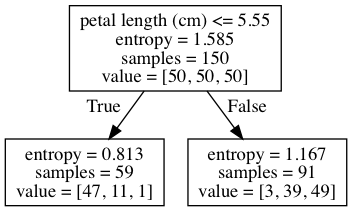

In [55]:
draw_decision_tree(tree1)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

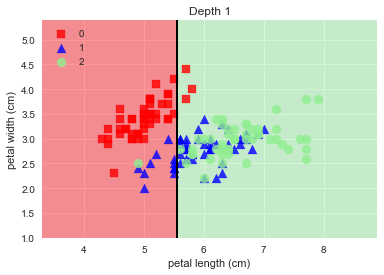

In [56]:
plot_decision_regions(X, y, tree1, "Depth 1")

In [57]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)
tree2

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

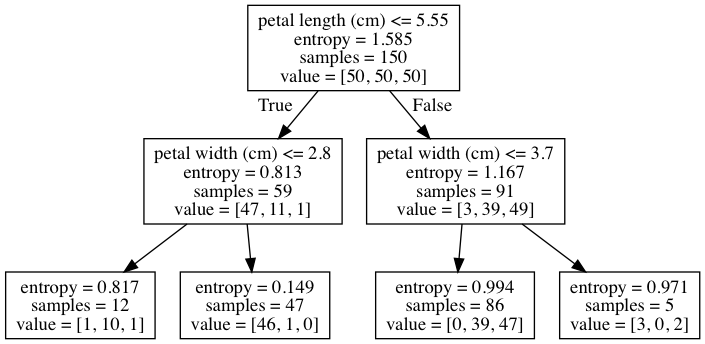

In [58]:
draw_decision_tree(tree2)

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

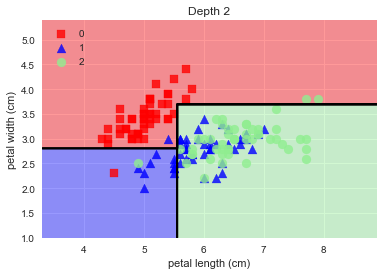

In [59]:
plot_decision_regions(X, y, tree2, "Depth 2")

In [60]:
confusion_matrix(y, tree2.predict(X))

array([[49,  1,  0],
       [ 1, 10, 39],
       [ 2,  1, 47]])

In [63]:
tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X, y)
tree5

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

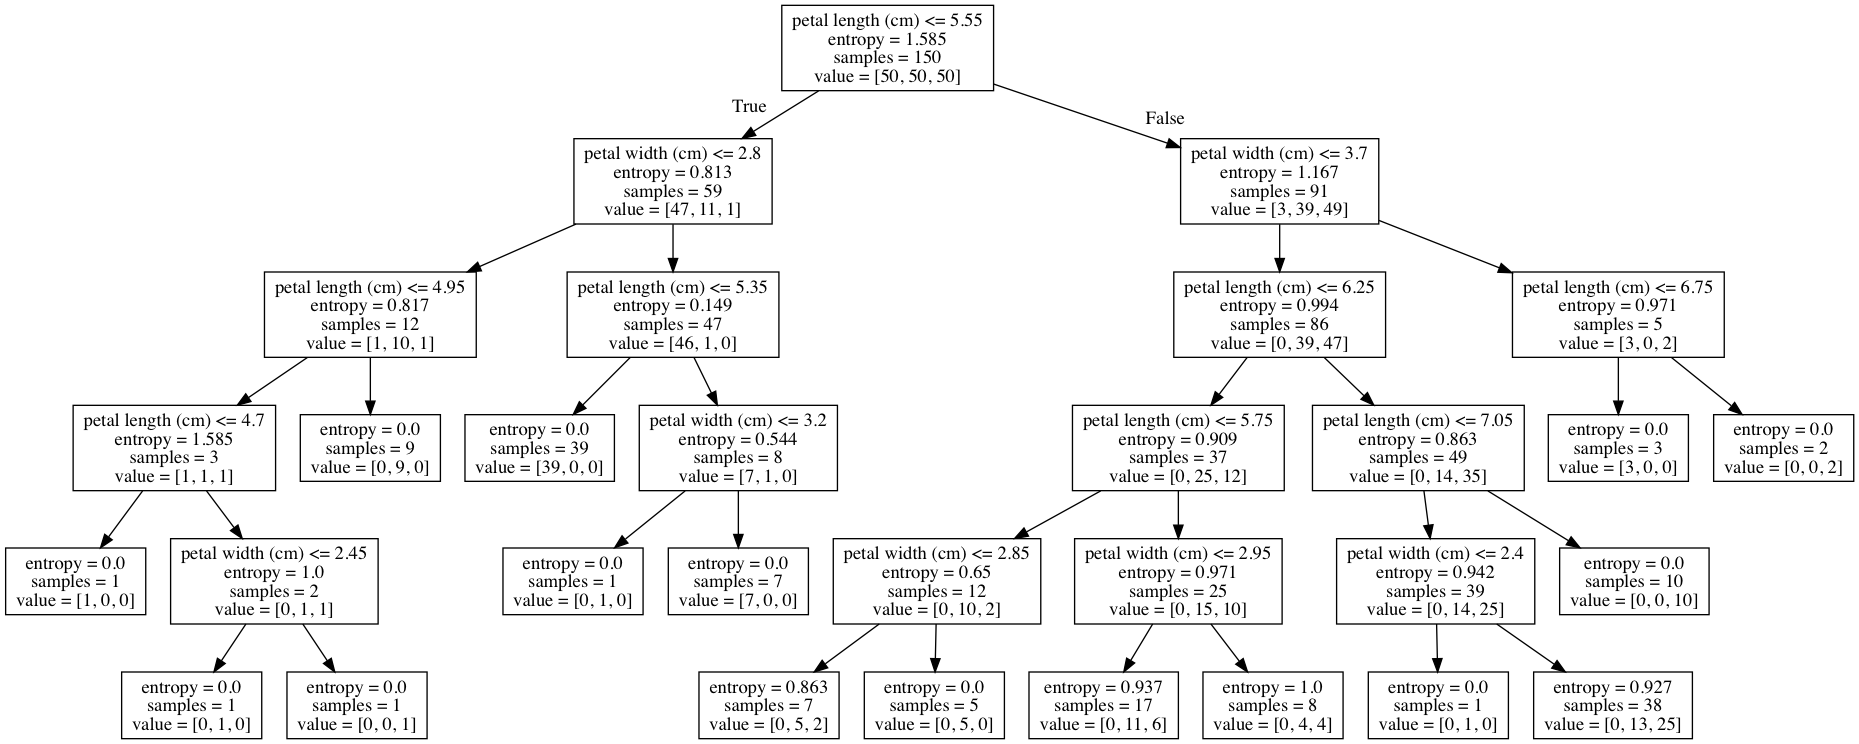

In [65]:
draw_decision_tree(tree5)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

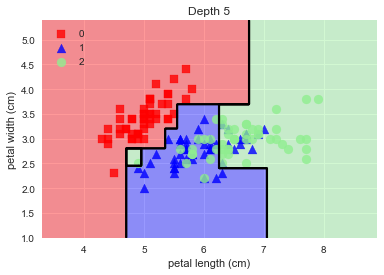

In [68]:
plot_decision_regions(X, y, tree5, "Depth 5")

In [66]:
confusion_matrix(y, tree5.predict(X))

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 12, 38]])

max_depth =  1  | accuracy :  0.6199999999999999
max_depth =  2  | accuracy :  0.6666666666666667
max_depth =  3  | accuracy :  0.6933333333333332
max_depth =  4  | accuracy :  0.7666666666666667
max_depth =  5  | accuracy :  0.76
max_depth =  6  | accuracy :  0.7133333333333333
max_depth =  7  | accuracy :  0.7
max_depth =  8  | accuracy :  0.7
max_depth =  9  | accuracy :  0.7133333333333332


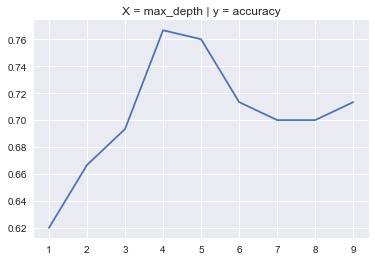

In [69]:
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target
accuracy = []

for i in range(1, 10):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0).fit(X, y)
    result = np.mean(cross_val_score(tree, X, y, scoring='accuracy', cv=5))
    accuracy.append(result)
    print("max_depth = ", i, " | accuracy : ", result)

plt.title("X = max_depth | y = accuracy")
plt.plot(range(1, 10), accuracy)
plt.show()
    # max_depth가 4일때, 평균 accuracy 성능이 가장 좋다.

### 예제2 : 타이타닉 생존자 예측

In [3]:
# embark_town / embarked

In [95]:
df = sns.load_dataset("titanic")
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [96]:
feature = ['pclass', 'age', 'sex']
dfX = df[feature].copy()
dfy = df['survived']
dfy.tail()

886    0
887    1
888    0
889    1
890    0
Name: survived, dtype: int64

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
le = LabelEncoder()

In [99]:
dfX['sex'] = le.fit_transform(dfX['sex'])
dfX.tail()

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [100]:
dfX['age'].mean()

29.69911764705882

In [101]:
dfX['age'].fillna(dfX['age'].mean(), inplace=True)

In [102]:
from sklearn.preprocessing import LabelBinarizer

In [103]:
lb = LabelBinarizer()

In [104]:
dfX2 = pd.DataFrame(lb.fit_transform(dfX['pclass']), columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del dfX['pclass']
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


In [105]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [112]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 5), (223, 5), (668,), (223,))

In [114]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=0).fit(X_train, y_train)

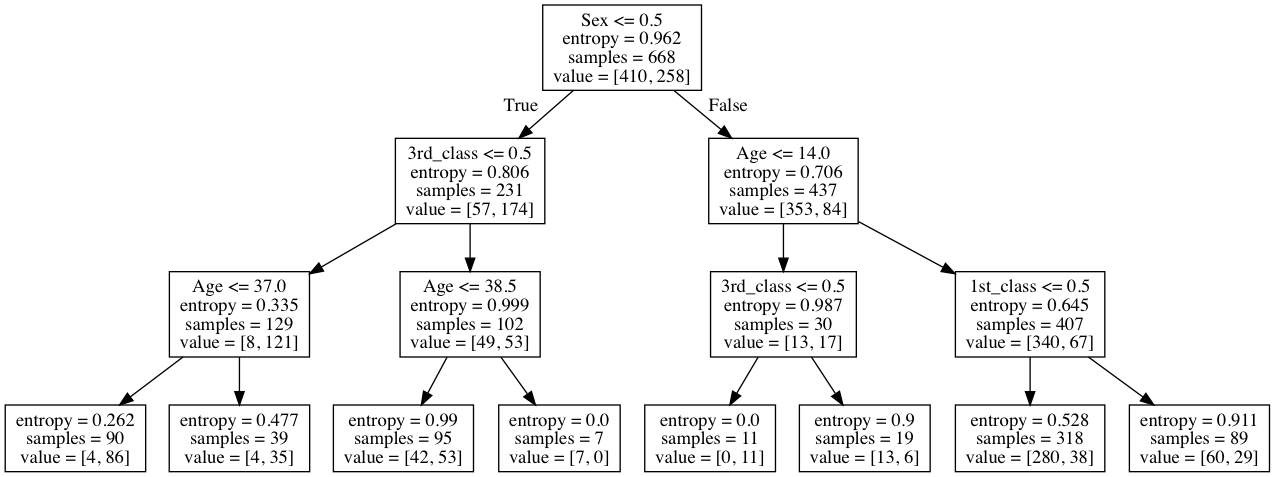

In [115]:
command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, feature_names=['Age', 'Sex', '1st_class', '2nd_class', '3rd_class'])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

In [116]:
confusion_matrix(y_train, model.predict(X_train))

array([[360,  50],
       [ 73, 185]])

In [117]:
confusion_matrix(y_test, model.predict(X_test))

array([[119,  20],
       [ 25,  59]])

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       410
          1       0.79      0.72      0.75       258

avg / total       0.81      0.82      0.81       668



In [119]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.86      0.84       139
          1       0.75      0.70      0.72        84

avg / total       0.80      0.80      0.80       223



### 연습문제 2

1. breast cancer 분류 문제를 의사 결정 나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
2. 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 기준은 무엇인가?

In [202]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

In [203]:
load_breast_cancer?

In [204]:
breast.data.shape, breast.target.shape

((569, 30), (569,))

In [205]:
dfX2 = pd.DataFrame(breast.data, columns=breast.feature_names)
dfy2 = pd.DataFrame(breast.target, columns=['tested'])
dfy2.tail()

,tested
564,0
565,0
566,0
567,0
568,1


In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX2, dfy2, test_size=0.25, random_state=0)

max_depth =  1  | accuracy :  0.8872698846980652
max_depth =  2  | accuracy :  0.887297895902547
max_depth =  3  | accuracy :  0.9248101100905479
max_depth =  4  | accuracy :  0.9271904110481403
max_depth =  5  | accuracy :  0.9318695850433197
max_depth =  6  | accuracy :  0.927217770829262
max_depth =  7  | accuracy :  0.9178060061233795
max_depth =  8  | accuracy :  0.9178060061233795
max_depth =  9  | accuracy :  0.9178060061233795


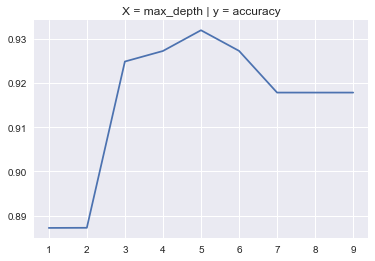

In [207]:
accuracy = []

for i in range(1, 10):
    model_cancer = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0).fit(dfX2, dfy2)
    result = np.mean(cross_val_score(model_cancer, X_train, y_train, scoring='accuracy', cv=5))
    accuracy.append(result)
    print("max_depth = ", i, " | accuracy : ", result)

plt.title("X = max_depth | y = accuracy")
plt.plot(range(1, 10), accuracy)
plt.show()
    # max_depth가 4일때, 평균 accuracy 성능이 가장 좋다.

In [208]:
from sklearn.tree import DecisionTreeClassifier
model_cancer = DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=1, random_state=0).fit(X_train, y_train)
model_cancer

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

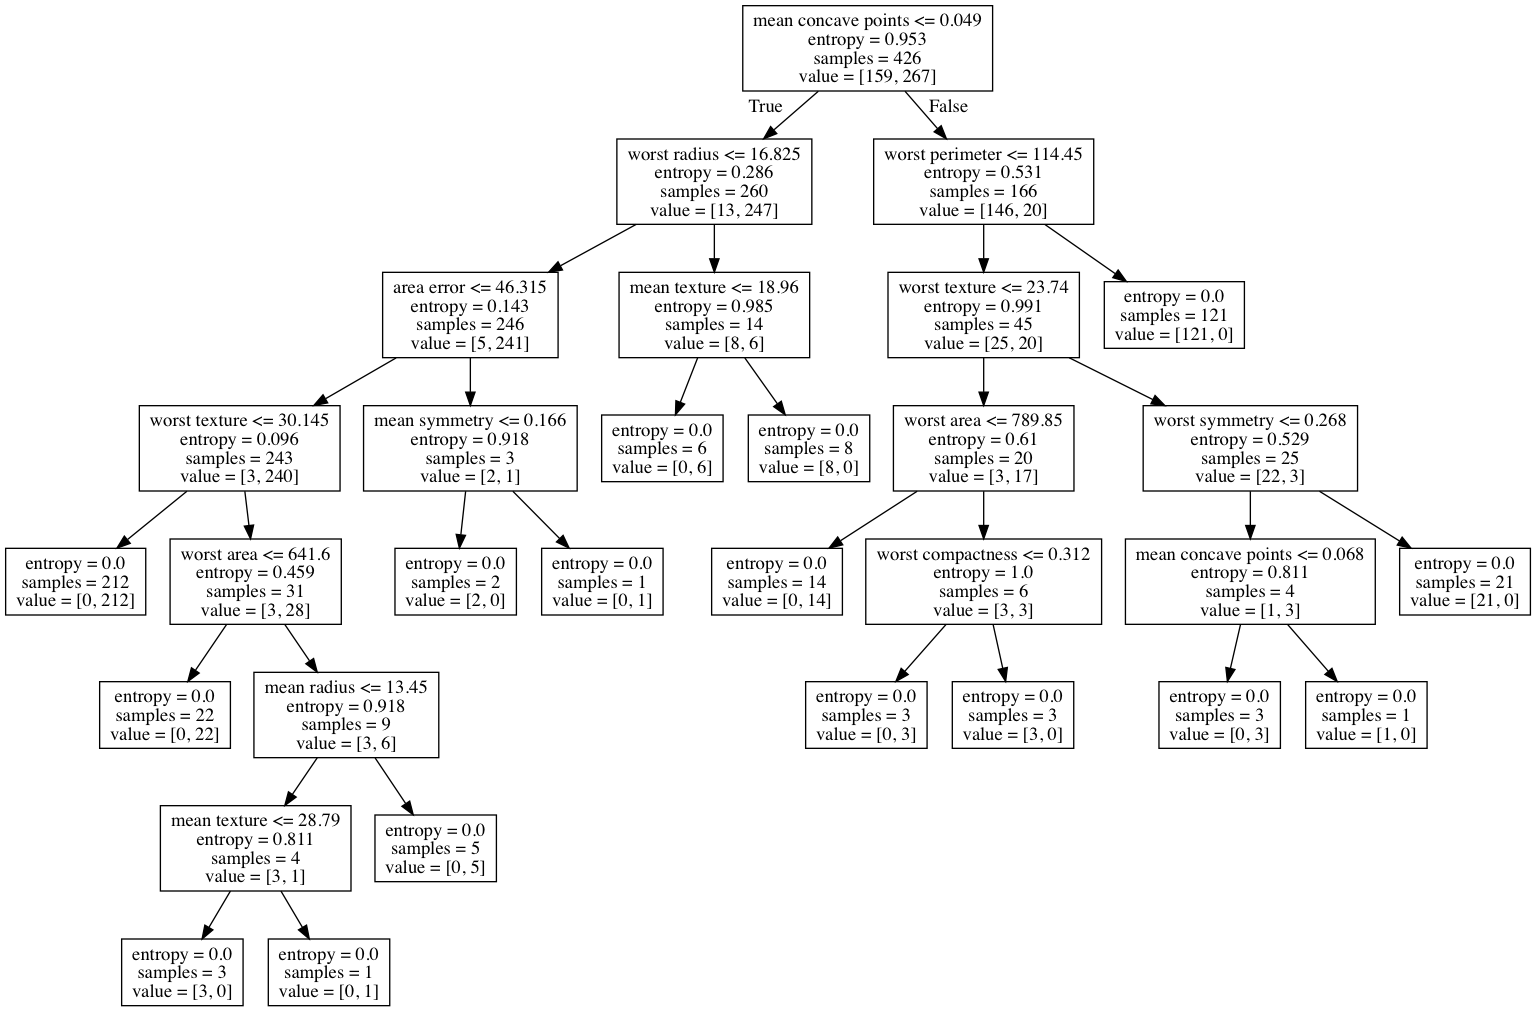

In [209]:
command_buf = io.StringIO()
export_graphviz(model_cancer, out_file=command_buf, feature_names=list(breast.feature_names))
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

In [210]:
print(confusion_matrix(y_train, model_cancer.predict(X_train)))
print(confusion_matrix(y_test, model_cancer.predict(X_test)))

[[159   0]
 [  0 267]]
[[51  2]
 [ 4 86]]


In [211]:
print(classification_report(y_train, model_cancer.predict(X_train)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       159
          1       1.00      1.00      1.00       267

avg / total       1.00      1.00      1.00       426



In [212]:
print(classification_report(y_test, model_cancer.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.96      0.94        53
          1       0.98      0.96      0.97        90

avg / total       0.96      0.96      0.96       143



### 연습 문제 3

- MINIST digit 이미지 분류 문제를 의사 결정 나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
- 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 픽셀은 어디인가? 이 픽셀은 숫자들을 어떻게 구분하게 되며 왜 그렇게 구분지어지는지 생각하라.

In [213]:
from sklearn.datasets import load_digits
digit = load_digits()

In [192]:
load_digits?

In [214]:
digit.data.shape, digit.target.shape, digit.images.shape, digit.target_names

((1797, 64), (1797,), (1797, 8, 8), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [215]:
dfX3 = pd.DataFrame(digit.data)
dfy3 = pd.DataFrame(digit.target, columns=['numbers'])
dfy3.tail()

,numbers
1792,9
1793,0
1794,8
1795,9
1796,8


In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX3, dfy3, test_size=0.25, random_state=0)

max_depth =  1  | accuracy :  0.1967080982255287
max_depth =  2  | accuracy :  0.35177051229590905
max_depth =  3  | accuracy :  0.5373893471083558
max_depth =  4  | accuracy :  0.6889645328310607
max_depth =  5  | accuracy :  0.7718791357630925
max_depth =  6  | accuracy :  0.8223878019239172
max_depth =  7  | accuracy :  0.8349960241007686
max_depth =  8  | accuracy :  0.8387115812137671
max_depth =  9  | accuracy :  0.8409209306131669


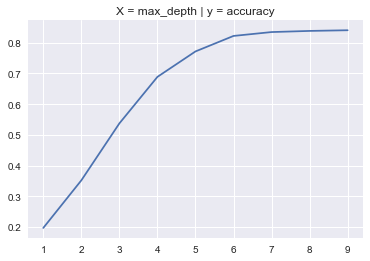

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

accuracy = []

for i in range(1, 10):
    model_digit = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_leaf=3, random_state=0).fit(X_train, y_train)
    result = np.mean(cross_val_score(model_digit, X_train, y_train, scoring='accuracy', cv=5))
    accuracy.append(result)
    print("max_depth = ", i, " | accuracy : ", result)
    
plt.title("X = max_depth | y = accuracy")
plt.plot(range(1, 10), accuracy)
plt.show()

In [223]:
model_digit = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=1, random_state=0).fit(X_train, y_train)
model_digit

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

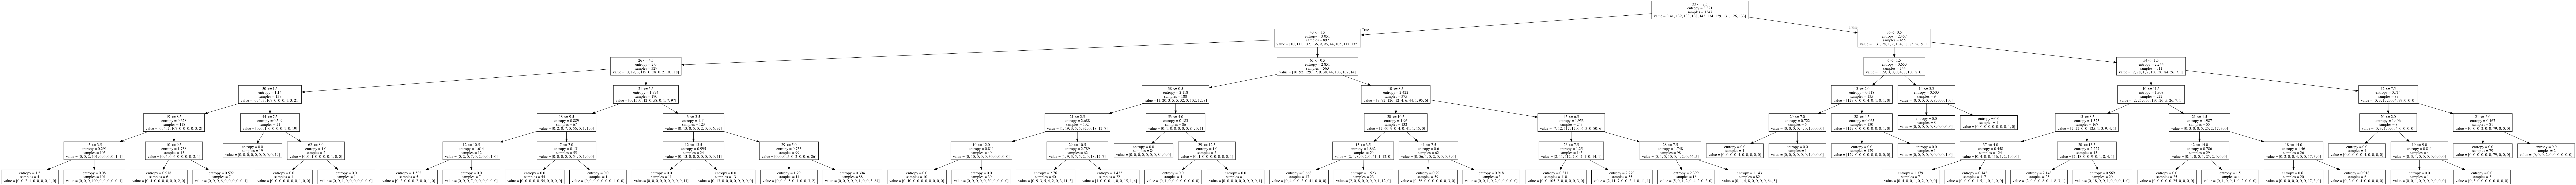

In [229]:
command_buf = io.StringIO()
export_graphviz(model_digit, out_file=command_buf, feature_names=list(np.arange(64)))
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

In [ ]:
# 33 샘플.

In [231]:
print(confusion_matrix(y_train, model_digit.predict(X_train)))
print(confusion_matrix(y_test, model_digit.predict(X_test)))

[[134   2   0   0   2   0   0   1   2   0]
 [  0 122   0   0   2   0   5   0  10   0]
 [  1   7 109   0   1   0   0   0  15   0]
 [  2   0   3 120   0   0   0   0  13   0]
 [  0   2   0   0 133   0   3   1   4   0]
 [  4   4   0   1   1 121   0   0   2   1]
 [  2   3   0   0   1   0 123   0   0   0]
 [  0   0   0   0   9   0   0 118   4   0]
 [  2  18   4   3   3   0   0   4  89   3]
 [  0   1   0   4   1   0   0   4   8 115]]
[[35  0  0  0  0  0  1  0  0  1]
 [ 0 35  0  0  0  1  4  1  2  0]
 [ 0  6 28  3  0  0  0  0  7  0]
 [ 0  1  2 35  0  1  0  0  5  1]
 [ 0  0  0  0 35  0  0  3  0  0]
 [ 0  3  0  0  4 40  0  0  0  1]
 [ 3  1  0  0  0  0 48  0  0  0]
 [ 0  1  0  0  5  1  0 39  2  0]
 [ 3 12  6  0  1  2  0  2 20  2]
 [ 2  3  1  2  0  1  0  1  3 34]]


In [233]:
print(classification_report(y_train, model_digit.predict(X_train)))

             precision    recall  f1-score   support

          0       0.92      0.95      0.94       141
          1       0.77      0.88      0.82       139
          2       0.94      0.82      0.88       133
          3       0.94      0.87      0.90       138
          4       0.87      0.93      0.90       143
          5       1.00      0.90      0.95       134
          6       0.94      0.95      0.95       129
          7       0.92      0.90      0.91       131
          8       0.61      0.71      0.65       126
          9       0.97      0.86      0.91       133

avg / total       0.89      0.88      0.88      1347



In [234]:
print(classification_report(y_test, model_digit.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.95      0.88        37
          1       0.56      0.81      0.67        43
          2       0.76      0.64      0.69        44
          3       0.88      0.78      0.82        45
          4       0.78      0.92      0.84        38
          5       0.87      0.83      0.85        48
          6       0.91      0.92      0.91        52
          7       0.85      0.81      0.83        48
          8       0.51      0.42      0.46        48
          9       0.87      0.72      0.79        47

avg / total       0.78      0.78      0.77       450

